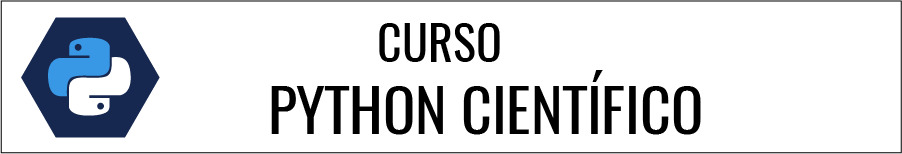

# Cálculo de Derivadas e Integrales numéricas con SciPy

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
from numpy.polynomial import polynomial as Poly

In [3]:
x = np.linspace(-10, 10, 101)
c = [-0.01308435, -0.99042367, 0.08888338,  1.01444905, -0.05729784]
q_Poly = Poly.Polynomial(c)

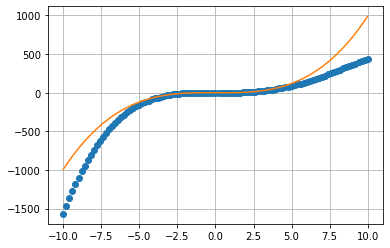

In [4]:
plt.plot(x, q_Poly(x), 'o', label='data')
plt.plot(x, x**3 - x, label='true')
plt.grid()
plt.show()

# Derivadas Numéricas de Numpy

In [8]:
# defining polynomial function
print("Polynomial function, f(x):\n", q_Poly)
print('----------------------------------------------')
# calculating the derivative
q_der = q_Poly.deriv()
print("Derivative, f(x)'=", q_der)
print('----------------------------------------------')
# calculates the derivative of after given value of x
print("When x=3.4  f(x)'=", q_der(3.4))

Polynomial function, f(x):
 -0.01308435 - 0.99042367·x¹ + 0.08888338·x² + 1.01444905·x³ -
0.05729784·x⁴
----------------------------------------------
Derivative, f(x)'= -0.99042367 + 0.17776676·x¹ + 3.0433471500000002·x² - 0.22919136·x³
----------------------------------------------
When x=3.4  f(x)'= 25.786939154560002


## scipy.misc.derivative desde scipy

In [9]:
from scipy.misc import derivative

In [11]:
def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)
4.9999999999217337

4.999999999921734

In [13]:
# f_der = f.deriv() # Ohhh!! No funciona

## scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

### quad

Si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`... La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. Sin emabrgo, sería más normal importar del siguiete modo:

In [14]:
from scipy.integrate import quad

De este modo se puede usar la función quad, simplemente como `quad`. Pero todavía no sabemos cómo funciona, ¿te atreves a investigarlo tú?

In [16]:
# help(quad)

[Aqui](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) hay más información.

Ahora definimos la función de interés:

$$f(x) = x \cdot sin(x)$$

In [17]:
def fun(x):
    return x * np.sin(x)

In [19]:
quad(fun, 0.0, 4.0)

(1.8577719881465191, 4.8906129421640846e-14)

## Ejercicio

In [22]:
# generar la x y la y
x = np.linspace(0,10,101)
y = fun(x)

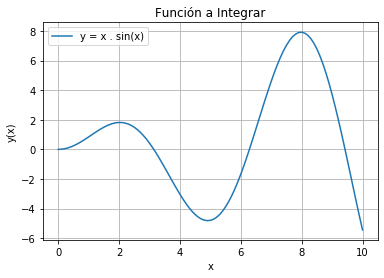

In [37]:
# Antes de integrarla generamos esta gráfica:
plt.plot(x, y, label= 'y = x . sin(x)')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.title('Función a Integrar')
plt.legend(loc='best')
plt.grid()
plt.show()
plt.show()

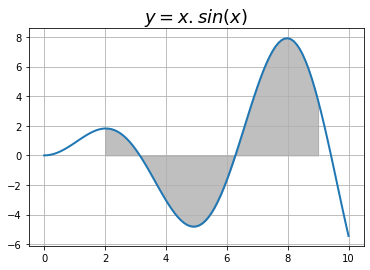

In [38]:

# título
plt.title('$y = x . sin(x)$', fontsize = 18)

# pintando la línea
plt.plot(x,y, linewidth = 2)

# pintando el relleno
x_fill = np.linspace(2,9,100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5)

# poniendo la cuadrícula
plt.grid()

#### Ahora integremos con `quad`

__Integremos__ la función en el intervalo $[2, 9]$.  
Recuerda que esto te calcula la integral, _no el área_:

In [39]:
value, err = quad(fun, 2, 9)
print("El resultado es: ", value, "con un error de: ", err)

El resultado es:  6.870699742283883 con un error de:  2.864870105641461e-13


#### Simpson y trapecio

Según figura en la documentación a estos métodos hay que pasarles las coordenadas de los puntos (no la función). Esto puede ser útil si no disponemos de una función, sino de una serie de valores, que por ejemplo, provienen de un experimento.

![](trap_xsinx.png)

In [40]:
I1, err1 = quad(fun, 2, 3.1)
I2, err2 = quad(fun, 3.1, 6.2)
print(I2)
I3, err3 = quad(fun, 6.2, 9)
IT = I1+I2+I3
errT =  np.sqrt(err1**2+err2**2+err3**2)
print("El resultado es: ", IT, "con un error de: ", errT)

-9.400550032641902
El resultado es:  6.870699742283879 con un error de:  1.9638518519381637e-13


In [41]:
x = np.linspace(2,9,100)

In [66]:
%%time
value, err = quad(fun, 2,9)
print("El resultado es: ", value, err)

El resultado es:  6.870699742283883 2.864870105641461e-13
CPU times: user 631 µs, sys: 28 µs, total: 659 µs
Wall time: 588 µs


In [44]:
from scipy.integrate import trapz

In [73]:
x = np.linspace(2,9,300)

In [76]:
%%time 
value = trapz(fun(x), x)
print("El resultado es: ", value)

El resultado es:  6.8703405071250145
CPU times: user 472 µs, sys: 21 µs, total: 493 µs
Wall time: 432 µs


El resultado es:  6.867422661707985    
CPU times: user 607 µs, sys: 27 µs, total: 634 µs  
Wall time: 634 µs

In [57]:
from scipy.integrate import simpson

In [60]:
%%time
x = np.linspace(2,9,100)
value = simpson(fun(x), x)
print("El resultado es: ", value)

El resultado es:  6.870575909500406
CPU times: user 3.05 ms, sys: 133 µs, total: 3.19 ms
Wall time: 7.53 ms


El resultado es:  6.870575909500406  
CPU times: user 526 µs, sys: 22 µs, total: 548 µs  
Wall time: 519 µs

In [61]:
from scipy.integrate import simps

In [63]:
%%time
value = simps(fun(x), x)
print("El resultado es: ", value)

El resultado es:  6.870575909500406
CPU times: user 775 µs, sys: 0 ns, total: 775 µs
Wall time: 720 µs


In [59]:
help(simpson)

Help on function simpson in module scipy.integrate._quadrature:

simpson(y, x=None, dx=1, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals. The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : int, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trapezoid